In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.datasets import load_boston

In [25]:
boston_dataset = load_boston()

In [26]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [27]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [28]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [29]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
boston['MEDV'] = boston_dataset.target

In [31]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

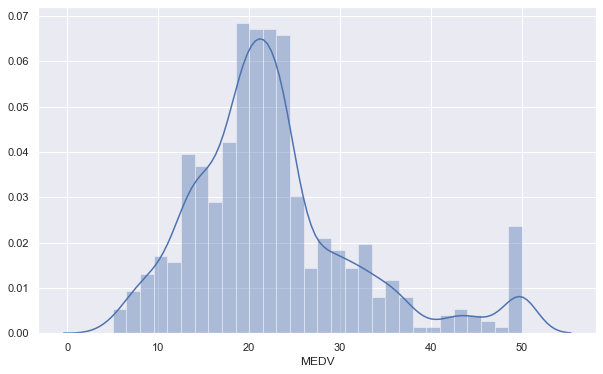

In [32]:
sns.set(rc={"figure.figsize":(10,6)}); np.random.seed(0)
sns.distplot(boston['MEDV'], bins = 30)
plt.show()

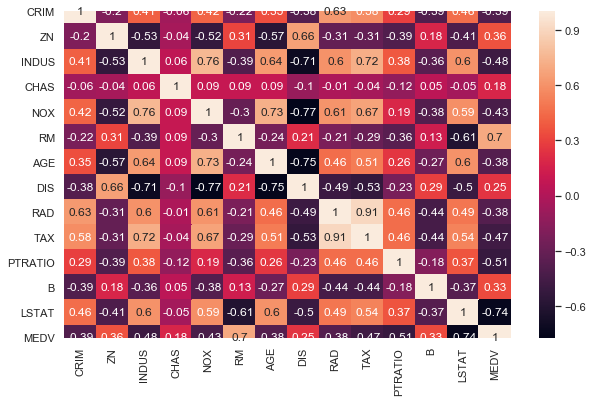

In [22]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

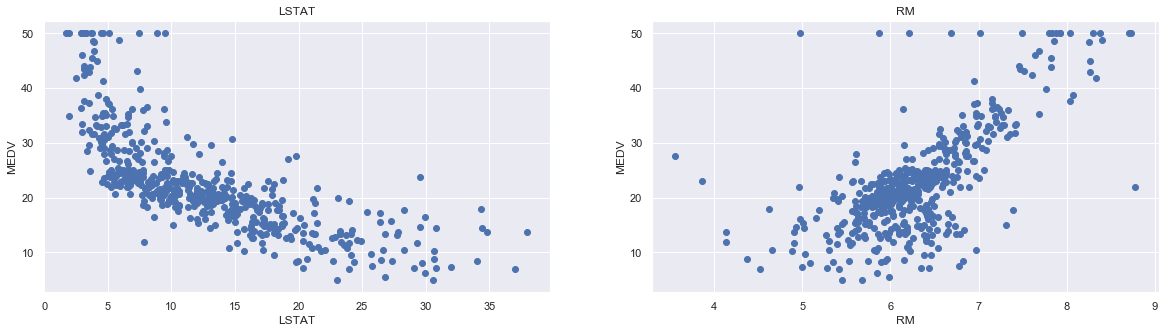

In [20]:
plt.figure(figsize = (20, 5))
features = ['LSTAT', 'RM']
target = boston['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    

In [44]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT', 'RM'])
Y = boston['MEDV']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.6371293350711955
0.6300745149331701


In [58]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

5.137400784702911
0.6628996975186953


In [61]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns = ['LSTAT', 'RM', 'PTRATIO'])
Y = boston['MEDV']

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [63]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.303863193307931
0.6725214335656511


In [66]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.913937534764083
0.6915878280744171


In [67]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS'])
Y = boston['MEDV']

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [74]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.301822475563458
0.672773386804643


In [76]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.926872285591007
0.6899620504104966


In [77]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX'])
Y = boston['MEDV']

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [79]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.29830406899895
0.6732075523202916


In [81]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.883605981271902
0.6953834600972874


In [83]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['TAX']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'TAX'])
Y = boston['MEDV']

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [85]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.303422189850911
0.6725758894106004


In [87]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.897434387599181
0.6936559148531634


In [90]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX'], boston['NOX']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX'])
Y = boston['MEDV']

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [92]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.298174847576449
0.6732234925417062


In [95]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.875485768563256
0.6963956198252873


In [96]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX'],
                       boston['NOX'], boston['CRIM']], columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM'])
Y = boston['MEDV']

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [98]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.274072419909306
0.6761898696013298


In [101]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.906961477301735
0.6924628794286782


In [103]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX'], boston['NOX'],
                      boston['CRIM'], boston['AGE'], boston['RAD']], columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX',
                                                                               'NOX', 'CRIM', 'AGE', 'RAD'])
Y = boston['MEDV']

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [105]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.122462151591175
0.6945389993696356


In [107]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.873515126610152
0.696641000344641


In [109]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX'], boston['NOX'],
                       boston['CRIM'], boston['AGE'], boston['RAD'], boston['ZN']], columns = ['LSTAT', 'RM', 'TPRATIO',
                                                                                               'INDUS', 'TAX', 'NOX',
                                                                                               'CRIM', 'AGE', 'RAD', 'ZN'])
Y = boston['MEDV']

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [111]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.1178055806649505
0.6950941051981544


In [113]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.894918278911763
0.6939706090178814


In [114]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX'], boston['NOX'],
                       boston['CRIM'], boston['AGE'], boston['RAD'], boston['ZN'], boston['B']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD', 'ZN','B']) 
Y = boston['MEDV']

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [116]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.029360095261339
0.7055417566311692


In [118]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.95298619166481
0.6866667515503547


In [119]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX'], boston['NOX'],
                       boston['CRIM'], boston['AGE'], boston['RAD'], boston['ZN'], boston['B'], boston['DIS']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD', 'ZN','B', 'DIS']) 
Y = boston['MEDV']

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [121]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

4.78630668032236
0.7333145643555354


In [124]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.620401498003291
0.7273335657563891


In [125]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX'], boston['NOX'],
                       boston['CRIM'], boston['AGE'], boston['RAD'], boston['ZN'], boston['B'], boston['DIS'], boston['CHAS']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'RAD', 'ZN','B', 'DIS', 'CHAS']) 
Y = boston['MEDV']

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [127]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

4.741000992236516
0.738339392059052


In [130]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.568292042303187
0.73344921474531


In [132]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['NOX'],
                       boston['CRIM'], boston['AGE'], boston['ZN'], boston['B'], boston['DIS'], boston['CHAS']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX', 'CRIM', 'AGE', 'ZN','B', 'DIS', 'CHAS']) 
Y = boston['MEDV']

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [135]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

4.878013641102737
0.7229971262862738


In [137]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.480086648361674
0.7436430628735198


In [138]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['NOX'],
                       boston['CRIM'], boston['ZN'], boston['B'], boston['CHAS']],
                 columns = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX', 'CRIM', 'ZN','B', 'CHAS']) 
Y = boston['MEDV']

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [140]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

5.138218943587488
0.692656901316425


In [142]:
y_test_predict = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2)

4.823669740238477
0.70281466291113
